Метрики качества:

Logistic Regression:
Accuracy: 1.0000
F1-Score: 1.0000

SVM:
Accuracy: 1.0000
F1-Score: 1.0000

Decision Tree:
Accuracy: 0.8333
F1-Score: 0.7778


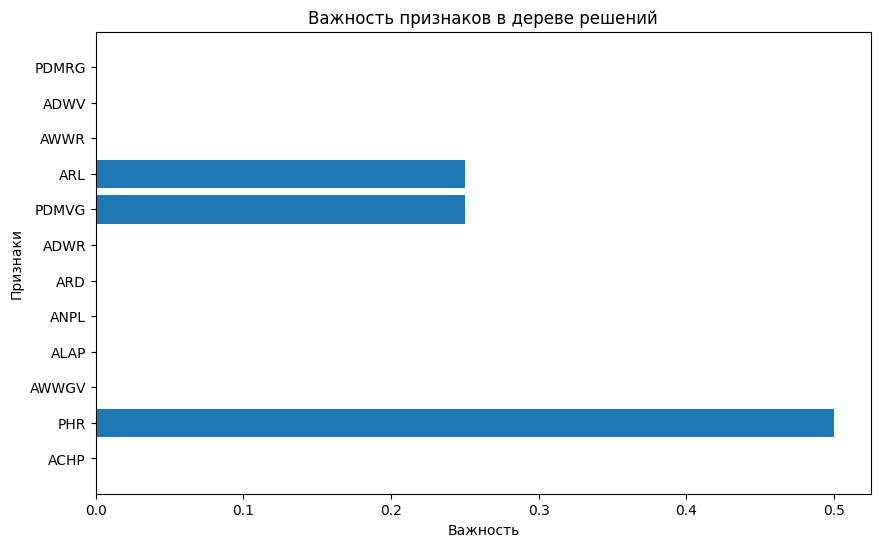

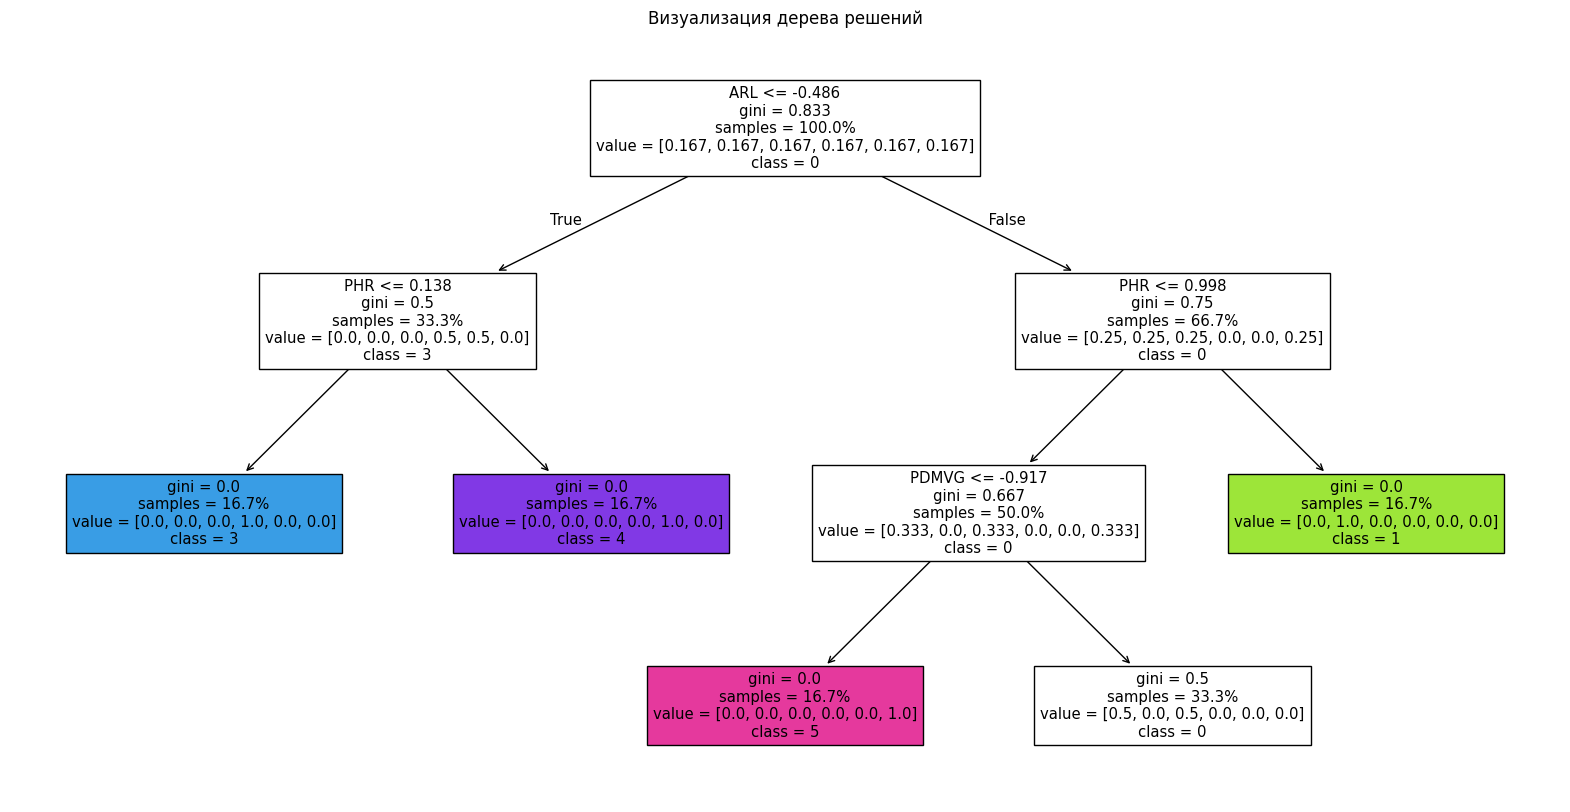


Правила дерева решений:
 |--- ARL <= -0.49
|   |--- PHR <= 0.14
|   |   |--- class: 3
|   |--- PHR >  0.14
|   |   |--- class: 4
|--- ARL >  -0.49
|   |--- PHR <= 1.00
|   |   |--- PDMVG <= -0.92
|   |   |   |--- class: 5
|   |   |--- PDMVG >  -0.92
|   |   |   |--- class: 0
|   |--- PHR >  1.00
|   |   |--- class: 1



In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Загрузка данных
df = pd.read_csv("Greenhouse Plant Growth Metrics.csv")

# Предобработка данных
# Удаление неинформативного столбца
df.drop('Random', axis=1, inplace=True)

# Заполнение пропусков (если есть)
#Корректное заполнение числовых пропусков медианой.
df.fillna(df.median(numeric_only=True), inplace=True)

# Кодирование целевой переменной (если необходимо)
#Проверка типа целевой переменной и её преобразование, если это строка.
if df['Class'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['Class'] = le.fit_transform(df['Class'])

# Разделение данных
#Разделение признаков и целевой переменной.
X = df.drop('Class', axis=1)
y = df['Class']

# Масштабирование признаков
#Масштабирование признаков — важно для логистической регрессии и SVM.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на train/test
#Используется стратификация — правильно при несбалансированных классах.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.3, 
    stratify=y,
    random_state=42
)

# Инициализация моделей
#Логистическая регрессия, SVM и дерево решений с ограничением глубины. Хороший выбор.
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(max_depth=3)
}

# Обучение и оценка моделей
#Корректный цикл обучения и оценки.
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

# Вывод результатов
print("Метрики качества:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")

# Визуализация важности признаков для дерева
dt_model = models["Decision Tree"]
plt.figure(figsize=(10, 6))
plt.barh(X.columns, dt_model.feature_importances_)
plt.title("Важность признаков в дереве решений")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.show()

# Визуализация структуры дерева
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=np.unique(y).astype(str),
    proportion=True
)
plt.title("Визуализация дерева решений")
plt.show()

# Текстовое представление правил
from sklearn.tree import export_text
tree_rules = export_text(
    dt_model,
    feature_names=list(X.columns)
)
print("\nПравила дерева решений:\n", tree_rules)